# File Exploration

In addition to core document processing capabilities, the `unstructured` library includes utilities for summarizing information about raw documents. We will cover how to use these utilities in this notebook. At the conclusion of this notebook, you should understand:

- [Filetype detection in `unstructured`](#filetype)
- [How to generate summary statistics about documents](#summary)

In [1]:
import os
import pathlib

DIRECTORY = os.path.abspath("")
EXAMPLE_DOCS_DIRECTORY = os.path.join(DIRECTORY, "..", "..", "example-docs")

## Filetype Detection <a id="filetype"></a>

The `unstructured` library includes a `detect_filetype` function that helps detect the type of an input file. To use the filetype detection utilities, you will need to install the `libmagic` library because `unstructured` uses this library under the hood for filetype detection. In addition to the MIME type from `libmagic`, the `unstructured` library uses the file extension and in some cases inspect the document to determine the document type. The following is an example of how to call `detect_filetype`.

In [2]:
from unstructured.file_utils.filetype import detect_filetype

filename = os.path.join(EXAMPLE_DOCS_DIRECTORY, "example-10k.html")
detect_filetype(filename=filename)

<FileType.HTML: 50>

The output of `detect_filetype` is a `FileType` enum, which is defined in [`filetype.py`](https://github.com/Unstructured-IO/unstructured/blob/main/unstructured/file_utils/filetype.py). Check out the source file to see the full list of files that are supported by `detect_filetype`.

## Summary Statistics <a id="summary"></a>

`unstructured` also provides utilities for summarizing the filetypes in a directory. You can use this utility for tasks such as counting by filetype and checking the average size of a file by filetype. The following example shows how to find a count of files by filetype in a directory and plot the results as a histogram.

In [3]:
from unstructured.file_utils.exploration import get_directory_file_info

file_info = get_directory_file_info(EXAMPLE_DOCS_DIRECTORY)
file_info.filetype.value_counts()

MIME type was message/rfc822. This file type is not currently supported in unstructured.


FileType.EML     4
FileType.TXT     3
FileType.HTML    2
FileType.XML     2
FileType.PDF     2
FileType.JPG     2
FileType.UNK     1
FileType.DOCX    1
FileType.PPTX    1
FileType.XLSX    1
Name: filetype, dtype: int64

<AxesSubplot: >

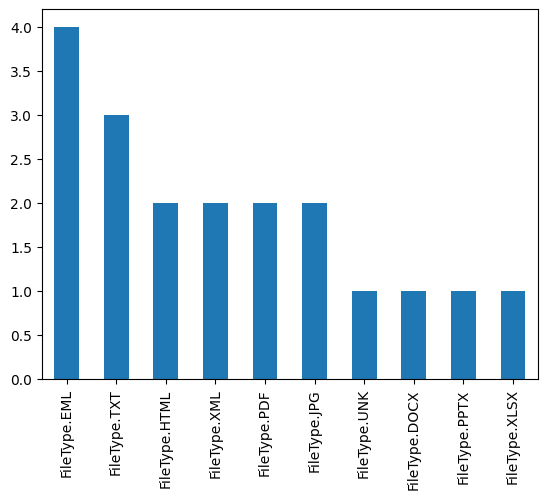

In [4]:
file_info.filetype.value_counts().plot.bar()

You can also use this utility to find the average file size of documents in a directory, grouped by filetype.

In [5]:
file_info.groupby("filetype").mean(numeric_only=True)

,filesize
filetype,
FileType.DOCX,36602.0
FileType.EML,149088.5
FileType.HTML,1228404.0
FileType.JPG,64002.5
FileType.PDF,2429245.0
FileType.PPTX,38412.0
FileType.TXT,619.0
FileType.UNK,1102.0
FileType.XLSX,4765.0


If you want to pass in a list of filenames instead of a directory, use `get_file_info` instead of `get_directory_file_info`, as seen in the workflow below:

In [6]:
from unstructured.file_utils.exploration import get_file_info

filenames = [os.path.join(EXAMPLE_DOCS_DIRECTORY, f) for f in os.listdir(EXAMPLE_DOCS_DIRECTORY)]

In [7]:
filenames

['/Users/mrobinson/repos/unstructured/examples/training/../../example-docs/fake-html.html',
 '/Users/mrobinson/repos/unstructured/examples/training/../../example-docs/example-10k.html',
 '/Users/mrobinson/repos/unstructured/examples/training/../../example-docs/factbook.xml',
 '/Users/mrobinson/repos/unstructured/examples/training/../../example-docs/fake-email-header.eml',
 '/Users/mrobinson/repos/unstructured/examples/training/../../example-docs/fake.docx',
 '/Users/mrobinson/repos/unstructured/examples/training/../../example-docs/fake-email-image-embedded.eml',
 '/Users/mrobinson/repos/unstructured/examples/training/../../example-docs/fake-text.txt',
 '/Users/mrobinson/repos/unstructured/examples/training/../../example-docs/layout-parser-paper-fast.pdf',
 '/Users/mrobinson/repos/unstructured/examples/training/../../example-docs/email-with-image.eml',
 '/Users/mrobinson/repos/unstructured/examples/training/../../example-docs/layout-parser-paper-fast.jpg',
 '/Users/mrobinson/repos/unstr

In [8]:
file_info = get_file_info(filenames=filenames)
file_info.filetype.value_counts()

MIME type was message/rfc822. This file type is not currently supported in unstructured.


FileType.EML     4
FileType.TXT     3
FileType.HTML    2
FileType.XML     2
FileType.PDF     2
FileType.JPG     2
FileType.UNK     1
FileType.DOCX    1
FileType.PPTX    1
FileType.XLSX    1
Name: filetype, dtype: int64